# Reading Images in Python

The focus here is simple but foundational: **how to read images into Python so we can process them later**.

Python offers multiple libraries for loading images, each with a slightly different philosophy and use case. Understanding these differences early saves a lot of confusion later especially when working with scientific data.

---

## Why So Many Image Libraries?

Images are just data, but they come in many forms: 2D, 3D, multi-channel, time-series, and metadata-rich scientific formats. Because of this, Python has multiple libraries, each optimized for different goals:

- **Pillow (PIL)** → Basic image manipulation  
- **Matplotlib** → Visualization and plotting  
- **scikit-image** → Scientific image processing  
- **OpenCV** → Computer vision and advanced image analysis  

We’ll start with common JPEG images and then briefly touch on proprietary microscopy formats.

---

## 1. Reading Images with Pillow (PIL)

**Pillow** is a lightweight image manipulation library. It’s excellent for tasks like resizing, cropping, and basic filtering.   

Installation:   
`pip install Pillow`   

**Important note**:
Pillow images are **objects**, not arrays.  
They behave more like files than data until you convert them.   

Import and Load an Image:

In [68]:
from PIL import Image

imgPIL1 = Image.open("test_image.jpeg")
imgPIL1.show()
print(f"Image type: {type(imgPIL1)}")
print(f"Image format: {imgPIL1.format}")

Image type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Image format: JPEG


At this stage:
- Pixel values are not directly accessible for math
- The image may not even be fully loaded until accessed (lazy loading)   

This is efficient for file handling but not ideal for analysis.   

**When Pillow Is Useful**
- Opening many image formats
- Quick inspection
- Saving images after processing
- Basic transformations before conversion to NumPy

**Converting to NumPy**   
If numerical processing is needed:

In [73]:
import numpy as np

img_array = np.asarray(imgPIL1)
print(f"Image: {img_array}")
print(f"Image type: {type(img_array)}")

Image: [[ 84  85  93 ...  15  13  16]
 [ 82  82  85 ...  14  13  13]
 [ 83  79  89 ...  20  19  18]
 ...
 [252   8   0 ...   0   0   0]
 [255   2   3 ...   0   0   0]
 [252   0   4 ...   0   0   0]]
Image type: <class 'numpy.ndarray'>


---

## 2. Reading Images with Matplotlib

Matplotlib reads images for **plotting**, not processing but it's still useful.

Installation:   
`pip install matplotlib`   

Import and Load:

In [74]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

imgMp1 = mpimg.imread("test_image.jpeg")
print(f"Image: {imgMp1}")
print(f"Image type: {type(imgMp1)}")


Image: [[ 84  85  93 ...  15  13  16]
 [ 82  82  85 ...  14  13  13]
 [ 83  79  89 ...  20  19  18]
 ...
 [252   8   0 ...   0   0   0]
 [255   2   3 ...   0   0   0]
 [252   0   4 ...   0   0   0]]
Image type: <class 'numpy.ndarray'>


Here, the image is already a NumPy array.

Check Its Shape:

In [75]:
print(imgMp1.shape)

(928, 1288)


928 pixesles height and 1288 pixeles width.

Displaying the Image:

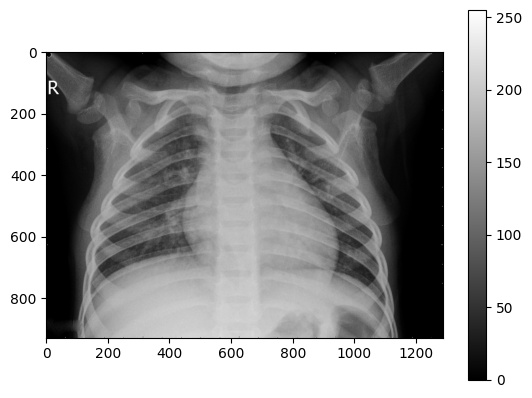

In [76]:
plt.imshow(imgMp1, cmap = "gray")
plt.colorbar()
plt.show()

Matplotlib is especially useful for visualization and debugging.

Now:
- The image is already a NumPy array
- You can immediately check shape, dtype, and values
- Perfect for learning and debugging

One subtlety:
- PNG files often load as floats (0–1)
- JPEG files often load as uint8 (0–255)
- Always check `img.dtype`.

---

## 3. Reading Images with scikit-image

scikit-image is a scientific image processing library built on NumPy. It’s widely used for segmentation, filtering, feature extraction, and traditional machine learning workflows.

Installation:   
`pip install scikit-image`

Import and load: 

In [77]:
from skimage import io

imgSi1 = io.imread("test_image.jpeg")
print(f"Image: {imgSi1}")
print(f"Image type: {type(imgSi1)}")

Image: [[ 84  85  93 ...  15  13  16]
 [ 82  82  85 ...  14  13  13]
 [ 83  79  89 ...  20  19  18]
 ...
 [252   8   0 ...   0   0   0]
 [255   2   3 ...   0   0   0]
 [252   0   4 ...   0   0   0]]
Image type: <class 'numpy.ndarray'>


Again, the image is loaded directly as a NumPy array.   
Let's Display with Matplotlib:

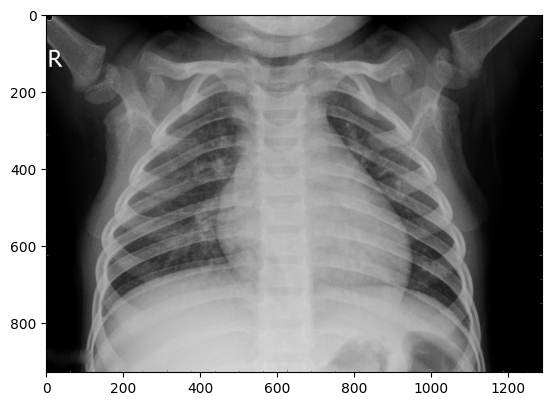

In [64]:
plt.imshow(imgSi1, cmap= "gray")
plt.show()

---

# 4. Reading Images with OpenCV

**OpenCV** is designed for computer vision tasks such as object detection, tracking, OCR, and video processing.   

Installation:   
`pip install opencv-python`   

Import and load:   

[[[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [0 2 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [0 2 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [0 1 1]
  [1 1 1]
  [1 1 1]]

 ...

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]]


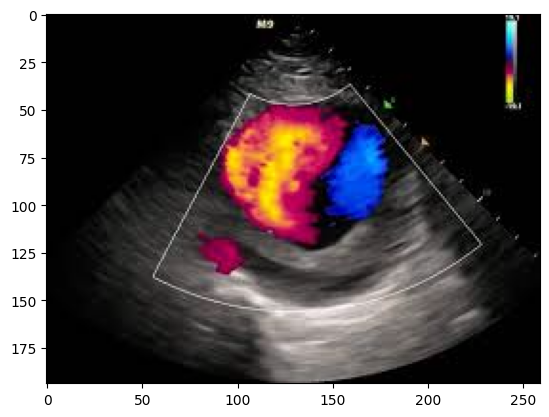

In [79]:
import cv2
import matplotlib.pyplot as plt

img4 = cv2.imread("doplerUS.jpg")
print(img4)
plt.imshow(img4)

Displaying with OpenCV: 

In [ ]:
cv2.imshow("Image", img4)
cv2.waitKey(0)
cv2.destroyAllWindows()

By default:   
- 0 → Grayscale
- 1 → Color
- -1 → Include alpha channel

In [81]:
grayImg = cv2.imread("doplerUS.jpg", 0)
colorImg = cv2.imread("doplerUS.jpg", 1)

cv2.imshow("Gray image", grayImg)
cv2.imshow("Color image", colorImg)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Important Color Note**

OpenCV uses BGR, not RGB.   
This causes color distortion when displayed with Matplotlib.

Fixing the Color Order:

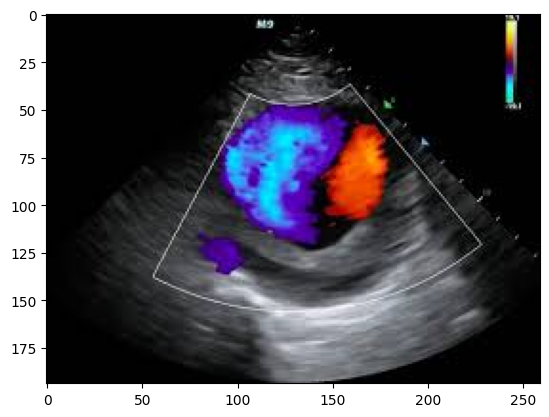

In [59]:
img_rgb = cv2.cvtColor(colorImg, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()